In [57]:
import os
import numpy as np
import pandas as pd
import librosa
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
import torch
import torch.nn as nn
from torchviz import make_dot
from torchsummary import summary

In [58]:
# data_dir="C:/Users/divya/OneDrive/Documents/UTAUSTIN/Semester 6/460j/final_project_data/fma_small"
# file_path="C:/Users/divya/OneDrive/Documents/UTAUSTIN/Semester 6/460j/final_project_data/fma_small/000/000002.mp3"
train_path = 'C:/Users/divya/OneDrive/Documents/UTAUSTIN/Semester6/460j/460jFinalProject/csvfiles/extracted_features_combined.csv'
train_path_2 = 'C:/Users/divya/OneDrive/Documents/UTAUSTIN/Semester6/460j/460jFinalProject/csvfiles/extracted_features_wav2vec.csv'
torch.manual_seed(42)


In [59]:
data_df=pd.read_csv(train_path, index_col=0)
data_df_2=pd.read_csv(train_path_2, index_col=0)
# data_df=pd.read_csv(train_path)

In [103]:
combined_df = pd.concat([data_df, data_df_2], ignore_index=True)


In [104]:
display(combined_df.head())

,0,1,2,3,4,5,6,7,8,9,...,1176,1177,1178,1179,1180,1181,1182,1183,1184,genre
0,-122.713936,117.760094,-42.334183,38.061005,-23.012323,23.920383,-11.944865,13.687291,-7.294582,4.041143,...,0.000032,0.000033,0.000039,0.000048,0.000078,0.000110,0.000089,0.000050,0.000029,Hip-Hop
1,-162.232422,131.435989,-18.426781,51.631371,-15.444844,23.860094,-7.867664,10.686234,-0.314591,12.864646,...,0.000039,0.000041,0.000060,0.000092,0.000102,0.000146,0.000153,0.000072,0.000038,Hip-Hop
2,-75.631538,154.537613,-63.849487,22.506426,2.425359,10.459981,-13.007332,9.818939,-7.640783,3.136315,...,0.000056,0.000066,0.000069,0.000083,0.000095,0.000103,0.000103,0.000072,0.000058,Pop
3,-322.997864,133.684906,15.497437,54.755615,8.718211,37.022747,-2.116411,15.265619,6.175477,-2.599205,...,0.000041,0.000035,0.000031,0.000038,0.000050,0.000052,0.000034,0.000024,0.000022,Folk
4,-253.314560,157.769379,-6.081675,26.920168,6.813843,15.842272,-12.930041,10.373278,-0.609945,-8.300909,...,0.000029,0.000025,0.000026,0.000048,0.000095,0.000081,0.000036,0.000029,0.000023,Folk


In [60]:

X_main = StandardScaler().fit_transform(data_df.drop('genre', axis=1))
y_main = pd.factorize(data_df['genre'])[0]  # Convert genre to numerical labels


X_second = StandardScaler().fit_transform(data_df_2.drop('genre', axis=1))
y_second = pd.factorize(data_df_2['genre'])[0]  # Convert genre to numerical labels


In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [62]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
X_train, X_test, y_train_main, y_test_main = train_test_split(X_main, y_main, test_size=0.3, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_main = scaler.fit_transform(X_train)
X_test_main = scaler.transform(X_test)

X_train_tensor_main = torch.tensor(X_train_main, dtype=torch.float32).to(device)
y_train_tensor_main = torch.tensor(y_train_main, dtype=torch.long).to(device)
X_test_tensor_main = torch.tensor(X_test_main, dtype=torch.float32).to(device)
y_test_tensor_main = torch.tensor(y_test_main, dtype=torch.long).to(device)

train_dataset_main = TensorDataset(X_train_tensor_main, y_train_tensor_main)
test_dataset_main = TensorDataset(X_test_tensor_main, y_test_tensor_main)
train_loader_main = DataLoader(train_dataset_main, batch_size=128, shuffle=True)
test_loader_main = DataLoader(test_dataset_main, batch_size=128, shuffle=False)

# X_train_tensor_rnn = X_train_tensor.unsqueeze(1).expand(-1, 10, -1)  # Shape becomes [batch_size, 1, num_features]
# X_test_tensor_rnn = X_test_tensor.unsqueeze(1).expand(-1, 10, -1)  # Shape becomes [batch_size, 1, num_features]
# train_dataset_rnn = TensorDataset(X_train_tensor_rnn, y_train_tensor)
# test_dataset_rnn = TensorDataset(X_test_tensor_rnn, y_test_tensor)
# train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=128, shuffle=True)
# test_loader_rnn = DataLoader(test_dataset_rnn, batch_size=128, shuffle=False)


In [63]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
X_train, X_test, y_train_second, y_test_second = train_test_split(X_second, y_second, test_size=0.3, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_second = scaler.fit_transform(X_train)
X_test_second = scaler.transform(X_test)

X_train_tensor_second = torch.tensor(X_train_second, dtype=torch.float32).to(device)
y_train_tensor_second = torch.tensor(y_train_second, dtype=torch.long).to(device)
X_test_tensor_second = torch.tensor(X_test_second, dtype=torch.float32).to(device)
y_test_tensor_second = torch.tensor(y_test_second, dtype=torch.long).to(device)

train_dataset_second = TensorDataset(X_train_tensor_second, y_train_tensor_second)
test_dataset_second = TensorDataset(X_test_tensor_second, y_test_tensor_second)
train_loader_second = DataLoader(train_dataset_second, batch_size=128, shuffle=True)
test_loader_second = DataLoader(test_dataset_second, batch_size=128, shuffle=False)

# X_train_tensor_rnn = X_train_tensor.unsqueeze(1).expand(-1, 10, -1)  # Shape becomes [batch_size, 1, num_features]
# X_test_tensor_rnn = X_test_tensor.unsqueeze(1).expand(-1, 10, -1)  # Shape becomes [batch_size, 1, num_features]
# train_dataset_rnn = TensorDataset(X_train_tensor_rnn, y_train_tensor)
# test_dataset_rnn = TensorDataset(X_test_tensor_rnn, y_test_tensor)
# train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=128, shuffle=True)
# test_loader_rnn = DataLoader(test_dataset_rnn, batch_size=128, shuffle=False)


In [64]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.BatchNorm1d(input_dim),
            nn.Linear(input_dim, 2048),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(2048, 1024),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),

            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Linear(128,out_features=output_dim)

        )
        
    def forward(self, x):
        return self.layers(x)


In [65]:
input_size_main = X_train_main.shape[1]
num_classes_main = len(np.unique(y_train_main))

In [66]:
input_size_second = X_train_second.shape[1]
num_classes_second= len(np.unique(y_train_second))

In [67]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model, train_loader, test_loader, device, epochs=100,lr=0.0001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    accuracies = []  # List to store accuracy for each epoch

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        total = correct = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        accuracies.append(accuracy)  # Store accuracy for this epoch

        print(f'Epoch {epoch+1}: Accuracy: {accuracy}%')

    # Plotting the accuracies
    plt.figure(figsize=(20, 5))
    plt.plot(range(1, epochs+1), accuracies, marker='o', linestyle='-')
    plt.title('Accuracy vs. Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.xticks(range(1, epochs+1))  # Ensure x-axis labels match epoch numbers
    plt.yticks(range(0, 101, 10))  # Setting y-axis labels from 0 to 100% with steps of 10%
    plt.show()

    return max(accuracies)  # Return the highest accuracy reached


Epoch 1: Accuracy: 39.05794080867028%
Epoch 2: Accuracy: 41.22551062942893%
Epoch 3: Accuracy: 46.39433097123801%
Epoch 4: Accuracy: 45.97749062109212%
Epoch 5: Accuracy: 46.22759483117966%
Epoch 6: Accuracy: 48.22842851187995%
Epoch 7: Accuracy: 48.27011254689454%
Epoch 8: Accuracy: 47.644852021675696%
Epoch 9: Accuracy: 43.80992080033347%
Epoch 10: Accuracy: 50.43768236765319%
Epoch 11: Accuracy: 48.93705710712797%
Epoch 12: Accuracy: 49.35389745727387%
Epoch 13: Accuracy: 49.85410587744894%
Epoch 14: Accuracy: 48.35348061692372%
Epoch 15: Accuracy: 50.31263026260942%
Epoch 16: Accuracy: 50.35431429762401%
Epoch 17: Accuracy: 49.6040016673614%
Epoch 18: Accuracy: 48.145060441850774%
Epoch 19: Accuracy: 50.06252605252188%
Epoch 20: Accuracy: 48.4368486869529%
Epoch 21: Accuracy: 50.64610254272613%
Epoch 22: Accuracy: 51.396415172988746%
Epoch 23: Accuracy: 52.27177990829512%
Epoch 24: Accuracy: 50.687786577740724%
Epoch 25: Accuracy: 51.60483534806169%
Epoch 26: Accuracy: 49.478949562

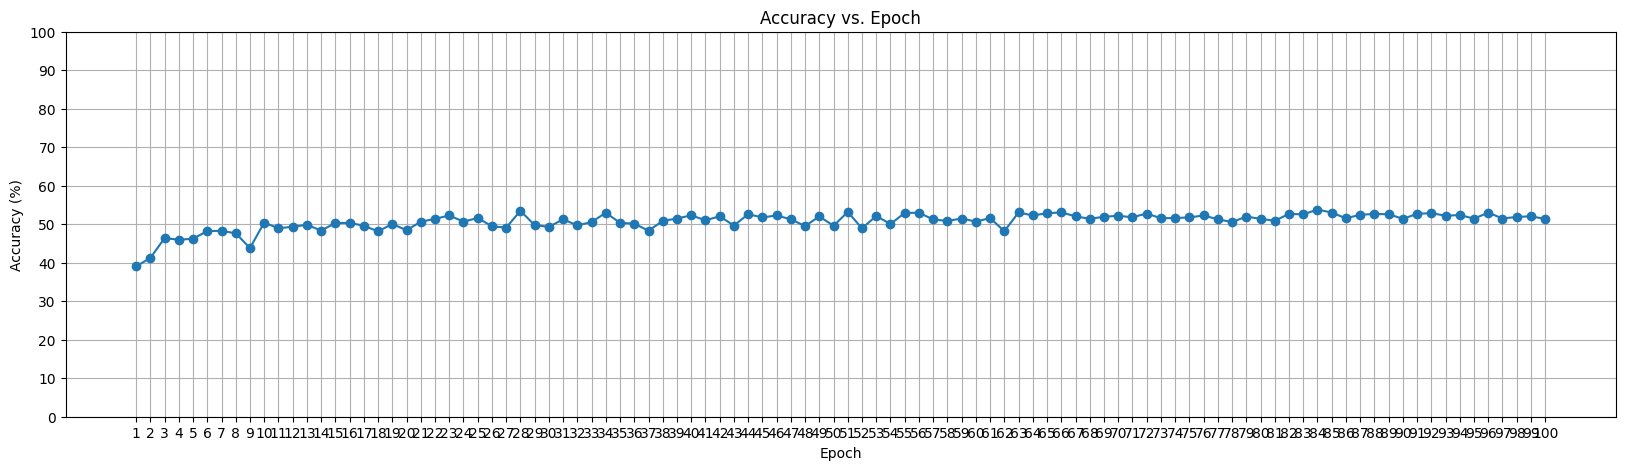

53.81408920383493

In [68]:
model_mlp_main=MLP(input_size_main,num_classes_main).to(device)
train_model(model_mlp_main, train_loader_main, test_loader_main, device)
# 54.127063531765884 entropy loss

Epoch 1: Accuracy: 37.083333333333336%
Epoch 2: Accuracy: 41.25%
Epoch 3: Accuracy: 42.75%
Epoch 4: Accuracy: 43.875%
Epoch 5: Accuracy: 43.958333333333336%
Epoch 6: Accuracy: 43.416666666666664%
Epoch 7: Accuracy: 42.541666666666664%
Epoch 8: Accuracy: 43.208333333333336%
Epoch 9: Accuracy: 43.333333333333336%
Epoch 10: Accuracy: 43.625%
Epoch 11: Accuracy: 42.625%
Epoch 12: Accuracy: 43.541666666666664%
Epoch 13: Accuracy: 43.125%
Epoch 14: Accuracy: 40.75%
Epoch 15: Accuracy: 42.458333333333336%
Epoch 16: Accuracy: 41.5%
Epoch 17: Accuracy: 42.458333333333336%
Epoch 18: Accuracy: 41.875%
Epoch 19: Accuracy: 41.666666666666664%
Epoch 20: Accuracy: 41.291666666666664%
Epoch 21: Accuracy: 41.708333333333336%
Epoch 22: Accuracy: 39.541666666666664%
Epoch 23: Accuracy: 39.208333333333336%
Epoch 24: Accuracy: 41.625%
Epoch 25: Accuracy: 39.416666666666664%
Epoch 26: Accuracy: 40.208333333333336%
Epoch 27: Accuracy: 41.625%
Epoch 28: Accuracy: 40.375%
Epoch 29: Accuracy: 42.125%
Epoch 30: 

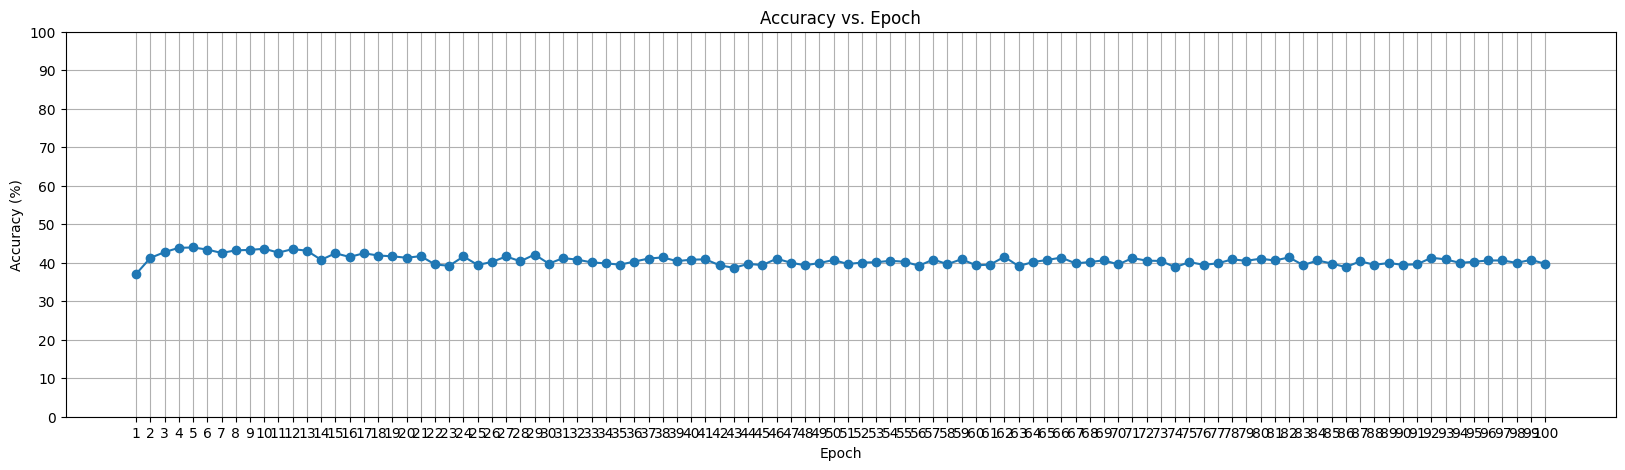

43.958333333333336

In [69]:
model_mlp_second=MLP(input_size_second,num_classes_second).to(device)
train_model(model_mlp_second, train_loader_second, test_loader_second, device)
# 54.127063531765884 entropy loss

In [100]:
print(combined_df['genre'].apply(type).value_counts())


<class 'pandas.core.series.Series'>    2
Name: count, dtype: int64


In [105]:

X = StandardScaler().fit_transform(combined_df.drop('genre', axis=1))
y = pd.factorize(combined_df['genre'])[0]  # Convert genre to numerical labels


In [106]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



In [107]:
input_size = X_train.shape[1]
num_classes = len(np.unique(y))

Epoch 1: Accuracy: 12.421842434347646%
Epoch 2: Accuracy: 12.421842434347646%
Epoch 3: Accuracy: 12.421842434347646%
Epoch 4: Accuracy: 12.421842434347646%
Epoch 5: Accuracy: 12.421842434347646%
Epoch 6: Accuracy: 12.421842434347646%
Epoch 7: Accuracy: 12.421842434347646%
Epoch 8: Accuracy: 12.421842434347646%
Epoch 9: Accuracy: 12.421842434347646%
Epoch 10: Accuracy: 12.421842434347646%
Epoch 11: Accuracy: 12.421842434347646%
Epoch 12: Accuracy: 12.421842434347646%
Epoch 13: Accuracy: 12.421842434347646%
Epoch 14: Accuracy: 12.421842434347646%
Epoch 15: Accuracy: 12.421842434347646%
Epoch 16: Accuracy: 12.421842434347646%
Epoch 17: Accuracy: 12.421842434347646%
Epoch 18: Accuracy: 12.421842434347646%
Epoch 19: Accuracy: 12.421842434347646%
Epoch 20: Accuracy: 12.421842434347646%
Epoch 21: Accuracy: 12.421842434347646%
Epoch 22: Accuracy: 12.421842434347646%
Epoch 23: Accuracy: 12.421842434347646%
Epoch 24: Accuracy: 12.421842434347646%
Epoch 25: Accuracy: 12.421842434347646%
Epoch 26:

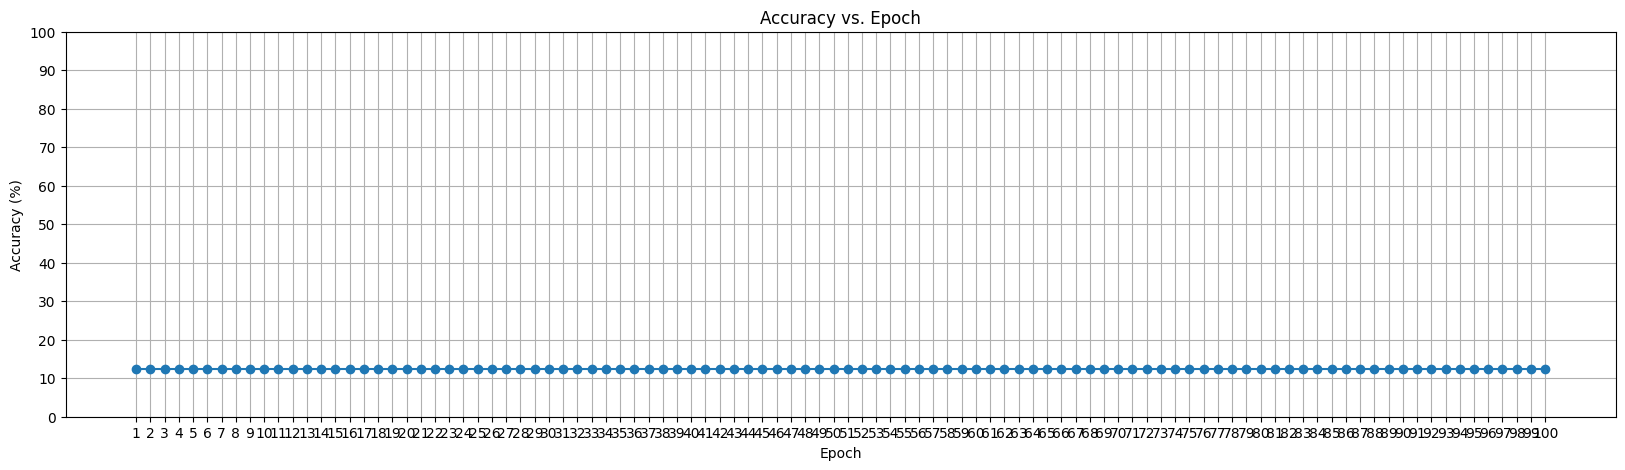

12.421842434347646

In [109]:
model_mlp=MLP(input_size,num_classes).to(device)
train_model(model_mlp, train_loader, test_loader, device,lr=0.1)
# 54.127063531765884 entropy loss